<a href="https://colab.research.google.com/github/pcsilcan/aed/blob/master/week11/11_SimpleBST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
%%writefile simplebst.h

#ifndef __SIMPLEBST_H__
#define __SIMPLEBST_H__

#include <functional>
#include <string>
#include <fstream>

class SimpleBST {
    struct Node {
        float element;
        Node* left;
        Node* right;

        Node(float elem)
            : element(elem), left(nullptr), right(nullptr) {}
    };

    Node* root;
public:
    SimpleBST() : root(nullptr) {}
    ~SimpleBST() {
        clear(root);
    }

    void clear() {
        clear(root);
    }

    void add(float elem) {
        add(root, elem);
    }

    bool find(float elem) {
        return find(root, elem);
    }

    void remove(float elem);

    void preorder(std::function<void(float)> proc);
    void postorder(std::function<void(float)> proc);
    void inorder(std::function<void(float)> proc);

    void generateDot(std::string filename);

private:
    void clear(Node* node) {
        if (node != nullptr) {
            clear(node->left);
            clear(node->right);
            delete node;
            node = nullptr;
        }
    }

    void add(Node*& node, float elem) {
        if (node == nullptr) {
            node = new Node(elem);
        } else if (elem < node->element) {
            add(node->left, elem);
        } else if (elem > node->element) {
            add(node->right, elem);
        }
    }

    bool find(Node* node, float elem) {
        if (node != nullptr) {
            if (elem == node->element) {
                return true;
            } else if (elem < node->element) {
                return find(node->left, elem);
            } else {
                return find(node->right, elem);
            }
        }
        return false;
    }

    void preorder(Node* node, std::function<void(float)> proc);
    void postorder(Node* node, std::function<void(float)> proc);
    void inorder(Node* node, std::function<void(float)> proc);

    void generate(Node* node, std::ofstream& file, int& cont);
};

#endif

Overwriting simplebst.h


## Recorridos del árbol

In [19]:
%%writefile simplebstroutes.cpp

#include "simplebst.h"

void SimpleBST::preorder(std::function<void(float)> proc) {
    preorder(root, proc);
}
void SimpleBST::preorder(Node* node, std::function<void(float)> proc) {
    if (node != nullptr) {
        proc(node->element);
        preorder(node->left, proc);
        preorder(node->right, proc);
    }
}


void SimpleBST::postorder(std::function<void(float)> proc) {
    postorder(root, proc);
}
void SimpleBST::postorder(Node* node, std::function<void(float)> proc) {
    if (node != nullptr) {
        postorder(node->left, proc);
        postorder(node->right, proc);
        proc(node->element);
    }
}


void SimpleBST::inorder(std::function<void(float)> proc) {
    inorder(root, proc);
}
void SimpleBST::inorder(Node* node, std::function<void(float)> proc) {
    if (node != nullptr) {
        inorder(node->left, proc);
        proc(node->element);
        inorder(node->right, proc);
    }
}

Overwriting simplebstroutes.cpp


## Generate DOT
Ésto es solamente código para dibujar el árbol, no es parte del alcance del curso, no será evaluado y no necesitan aprenderlo (a menos que quieran)!

[Más información acerca de Graphviz y el lenguaje DOT](https://www.graphviz.org/documentation/)

In [20]:
%%writefile simplebstdot.cpp

#include "simplebst.h"

void SimpleBST::generateDot(std::string filename) {
    if (root != nullptr) {
        std::ofstream file(filename);
        int cont = 0;
        file << "digraph G {\n";
        generate(root, file, cont);
        file << "}";
    }
}

void SimpleBST::generate(Node* node, std::ofstream& file, int& cont) {
    if (node->left != nullptr) {
        file << node->element << "->" << node->left->element << std::endl;
        generate(node->left, file, cont);
    } else {
        file << "null" << cont << " [shape=point]\n";
        file << node->element << "->null" << cont << std::endl;
        ++cont;
    }
    if (node->right != nullptr) {
        file << node->element << "->" << node->right->element << std::endl;
        generate(node->right, file, cont);
    } else {
        file << "null" << cont << " [shape=point]\n";
        file << node->element << "->null" << cont << std::endl;
        ++cont;
    }
}

Overwriting simplebstdot.cpp


## Eliminar en un árbol binario
Primero debemos encontrar el elemento a eliminar. Luego debemos ubicar al mayor elemnto del hijo izquierdo y quitar dicho nodo, haciendo subir a su respectivo hizo izquierdo si existiera, caso contrario solamente subiremos al hizo derecho

In [21]:
%%writefile simplebstremove.cpp

#include "simplebst.h"

void SimpleBST::remove(float elem) {
    // Encontrar elemento a eliminar;
    Node* aux = root;
    Node* auxParent = nullptr;
    bool leftChild;
    while (aux != nullptr) {
        if (elem == aux->element) {
            break;
        } else if (elem < aux->element) {
            auxParent = aux;
            leftChild = true;
            aux = aux->left;
        } else {
            auxParent = aux;
            leftChild = false;
            aux = aux->right;
        }
    }
    if (aux == nullptr) return;                 // No se encontró el elemento a eliminar

    // Ahora eliminamos en caso no tenga hijo izquierdo
    if (aux->left == nullptr) {                 // No tiene hijo izquierdo, sube el derecho
        if (auxParent == nullptr) {             // El elemento a eliminar es root
            root = aux->right;
        } else if (leftChild) {                 // El elemento a eliminar es el izq de parent
            auxParent->left = aux->right;
        } else {                                // es el derecho de parent
            auxParent->right = aux->right;
        }
        delete aux;
        return;
    }

    // En caso si exista hijo izquierdo, buscamos al mayor de dicho subárbol
    Node* aux2 = aux->left;
    Node* aux2Parent = aux;
    leftChild = true;
    while (aux2->right != nullptr) {
        aux2Parent = aux2;
        leftChild = false;
        aux2 = aux2->right;
    }
    aux->element = aux2->element;               // Reemplazamos al elemento a eliminar
    if (leftChild) {
        aux2Parent->left = aux2->left;
    } else {
        aux2Parent->right = aux2->left;
    }
    delete aux2;
}


Overwriting simplebstremove.cpp


In [22]:
%%writefile simplebstTest.cpp

#include <iostream>
#include <vector>
#include "simplebst.h"

using namespace std;

int main() {
    SimpleBST* bst = new SimpleBST();

    vector<int> v = {34, 3, 1, 67, 69, 23, 4, 79, 43,
                     20, 14, 54, 12, 8, 99, 15, 62, 26 };
            
    for (auto num: v) {
        bst->add(num);
    }

    auto print = [](float x) { cout << x << " "; };

    bst->postorder(print); cout << endl;
    bst->preorder(print); cout << endl;
    bst->inorder(print); cout << endl;

    cout << bst->find(100) << endl;
    cout << bst->find(4) << endl;

    bst->generateDot("bst.dot");

    bst->remove(23);

    bst->generateDot("bst2.dot");

    delete bst;
    return 0;
}

Overwriting simplebstTest.cpp


In [23]:
%%script bash

g++ -std=c++17 *cpp && ./a.out

1 8 12 15 14 20 4 26 23 3 62 54 43 99 79 69 67 34 
34 3 1 23 4 20 14 12 8 15 26 67 43 54 62 69 79 99 
1 3 4 8 12 14 15 20 23 26 34 43 54 62 67 69 79 99 
0
1


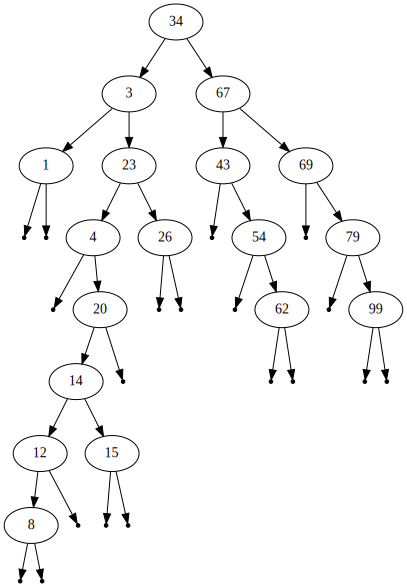

In [24]:
import graphviz as gv
gv.Source.from_file("bst.dot")

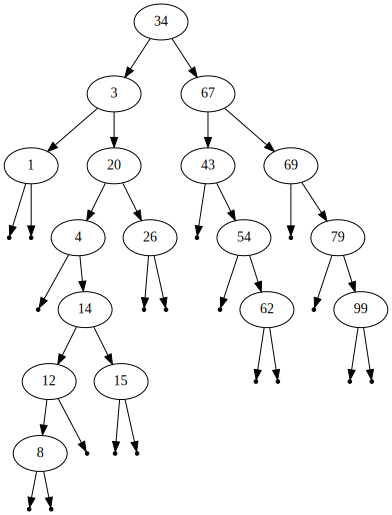

In [25]:
gv.Source.from_file("bst2.dot")

In [26]:
!cat bst.dot

digraph G {
34->3
3->1
null0 [shape=point]
1->null0
null1 [shape=point]
1->null1
3->23
23->4
null2 [shape=point]
4->null2
4->20
20->14
14->12
12->8
null3 [shape=point]
8->null3
null4 [shape=point]
8->null4
null5 [shape=point]
12->null5
14->15
null6 [shape=point]
15->null6
null7 [shape=point]
15->null7
null8 [shape=point]
20->null8
23->26
null9 [shape=point]
26->null9
null10 [shape=point]
26->null10
34->67
67->43
null11 [shape=point]
43->null11
43->54
null12 [shape=point]
54->null12
54->62
null13 [shape=point]
62->null13
null14 [shape=point]
62->null14
67->69
null15 [shape=point]
69->null15
69->79
null16 [shape=point]
79->null16
79->99
null17 [shape=point]
99->null17
null18 [shape=point]
99->null18
}